# LIBRARY

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# LOAD DATA

In [65]:
player_df = pd.read_csv("https://raw.githubusercontent.com/dfin12/submission_pertama_machine_learning_terapan/refs/heads/main/players_21.csv")

# EDA

Melihat tipe data setiap kolom

In [66]:
player_df.info(verbose=True, max_cols=None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 106 columns):
 #    Column                      Dtype  
---   ------                      -----  
 0    sofifa_id                   int64  
 1    player_url                  object 
 2    short_name                  object 
 3    long_name                   object 
 4    age                         int64  
 5    dob                         object 
 6    height_cm                   int64  
 7    weight_kg                   int64  
 8    nationality                 object 
 9    club_name                   object 
 10   league_name                 object 
 11   league_rank                 float64
 12   overall                     int64  
 13   potential                   int64  
 14   value_eur                   int64  
 15   wage_eur                    int64  
 16   player_positions            object 
 17   preferred_foot              object 
 18   international_reputation    int64  
 19   we

In [67]:
player_df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3


Melihat statistika deskriptif

In [68]:
player_df.describe()

,sofifa_id,age,height_cm,weight_kg,league_rank,overall,potential,value_eur,wage_eur,international_reputation,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18944.000000,18944.000000,18944.000000,18944.000000,18719.000000,18944.000000,18944.000000,1.894400e+04,18944.000000,18944.000000,...,18944.000000,18944.000000,0.0,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000
mean,226242.402872,25.225823,181.190773,75.016892,1.357070,65.677787,71.086729,2.224813e+06,8675.852513,1.091850,...,48.050412,57.978674,NaN,47.581767,45.546505,16.446052,16.236486,16.103357,16.225982,16.551309
std,27171.091056,4.697354,6.825672,7.057140,0.739327,7.002278,6.109985,5.102486e+06,19654.774894,0.361841,...,15.671721,12.118390,NaN,21.402461,20.953997,17.577332,16.845480,16.519399,17.017341,17.878121
min,41.000000,16.000000,155.000000,50.000000,1.000000,47.000000,47.000000,0.000000e+00,0.000000,1.000000,...,6.000000,12.000000,NaN,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,210030.500000,21.000000,176.000000,70.000000,1.000000,61.000000,67.000000,3.000000e+05,1000.000000,1.000000,...,38.750000,50.000000,NaN,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,232314.500000,25.000000,181.000000,75.000000,1.000000,66.000000,71.000000,6.500000e+05,3000.000000,1.000000,...,49.000000,59.000000,NaN,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,246760.250000,29.000000,186.000000,80.000000,1.000000,70.000000,75.000000,1.800000e+06,7000.000000,1.000000,...,60.000000,66.000000,NaN,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,258970.000000,53.000000,206.000000,110.000000,4.000000,93.000000,95.000000,1.055000e+08,560000.000000,5.000000,...,92.000000,96.000000,NaN,93.000000,90.000000,90.000000,92.000000,93.000000,91.000000,90.000000


Melihat missing value pada data

In [69]:
# pengecekan missing value
missing_values = player_df.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]
columns_with_missing_values

,0
club_name,225
league_name,225
league_rank,225
release_clause_eur,995
player_tags,17536
team_position,225
team_jersey_number,225
loaned_from,18186
joined,983
contract_valid_until,225


Melihat adanya duplikasi pada data

In [70]:
# melihat duplikasi data
duplicate_rows = player_df[player_df.duplicated()]
duplicate_rows

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb


# PREPROCESSING DATA

Mengisi skill gk_skill pada pemain outfield

In [71]:
# membuat kolom gk_skill
player_df['gk_skill'] = player_df[['gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning']].mean(axis=1)

In [72]:
# pemain outfield gk_skillnya nan, maka akan diisi dari 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes'
player_df['gk_skill_alt'] = player_df[['goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']].mean(axis=1)
player_df['gk_skill'] = player_df['gk_skill'].fillna(player_df['gk_skill_alt'])
player_df.drop(columns=['gk_skill_alt'], inplace=True)


Mengisi skill pace, shooting, dribbling, passing, pace, defending, physic pada pemain GK

In [73]:
# skill pada posisi gk
player_df['is_gk'] = player_df['player_positions'].str.startswith('GK')

In [74]:
# Pace
player_df['pace'] = np.where(
    player_df['is_gk'],
    player_df[['movement_acceleration', 'movement_sprint_speed']].mean(axis=1),
    player_df['pace']
)

# Shooting
player_df['shooting'] = np.where(
    player_df['is_gk'],
    player_df[['attacking_finishing', 'attacking_volleys', 'power_shot_power', 'power_long_shots', 'mentality_penalties']].mean(axis=1),
    player_df['shooting']
)

# Passing
player_df['passing'] = np.where(
    player_df['is_gk'],
    player_df[['attacking_crossing', 'attacking_short_passing', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'mentality_vision']].mean(axis=1),
    player_df['passing']
)

# Defending
player_df['defending'] = np.where(
    player_df['is_gk'],
    player_df[['defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 'mentality_interceptions']].mean(axis=1),
    player_df['defending']
)

# Physic
player_df['physic'] = np.where(
    player_df['is_gk'],
    player_df[['power_strength', 'power_stamina', 'power_jumping', 'mentality_aggression', 'movement_balance']].mean(axis=1),
    player_df['physic']
)

# Dribbling
player_df['dribbling'] = np.where(
    player_df['is_gk'],
    player_df[['skill_dribbling', 'skill_ball_control', 'movement_agility', 'movement_reactions', 'mentality_composure', 'attacking_heading_accuracy']].mean(axis=1),
    player_df['dribbling']
)

In [75]:
player_df.drop(columns='is_gk', inplace=True)

In [76]:
# menyatukan skill pemain
skill = ['pace', 'shooting', 'passing', 'defending', 'physic', 'dribbling', 'gk_skill']

In [77]:
player_df[skill].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pace       18944 non-null  float64
 1   shooting   18944 non-null  float64
 2   passing    18944 non-null  float64
 3   defending  18944 non-null  float64
 4   physic     18944 non-null  float64
 5   dribbling  18944 non-null  float64
 6   gk_skill   18944 non-null  float64
dtypes: float64(7)
memory usage: 1.0 MB


In [78]:
player_df["player_positions"]

,player_positions
0,"RW, ST, CF"
1,"ST, LW"
2,GK
3,ST
4,"LW, CAM"
...,...
18939,CM
18940,CB
18941,CB
18942,CM


Melihat distribusi pada skill pemain

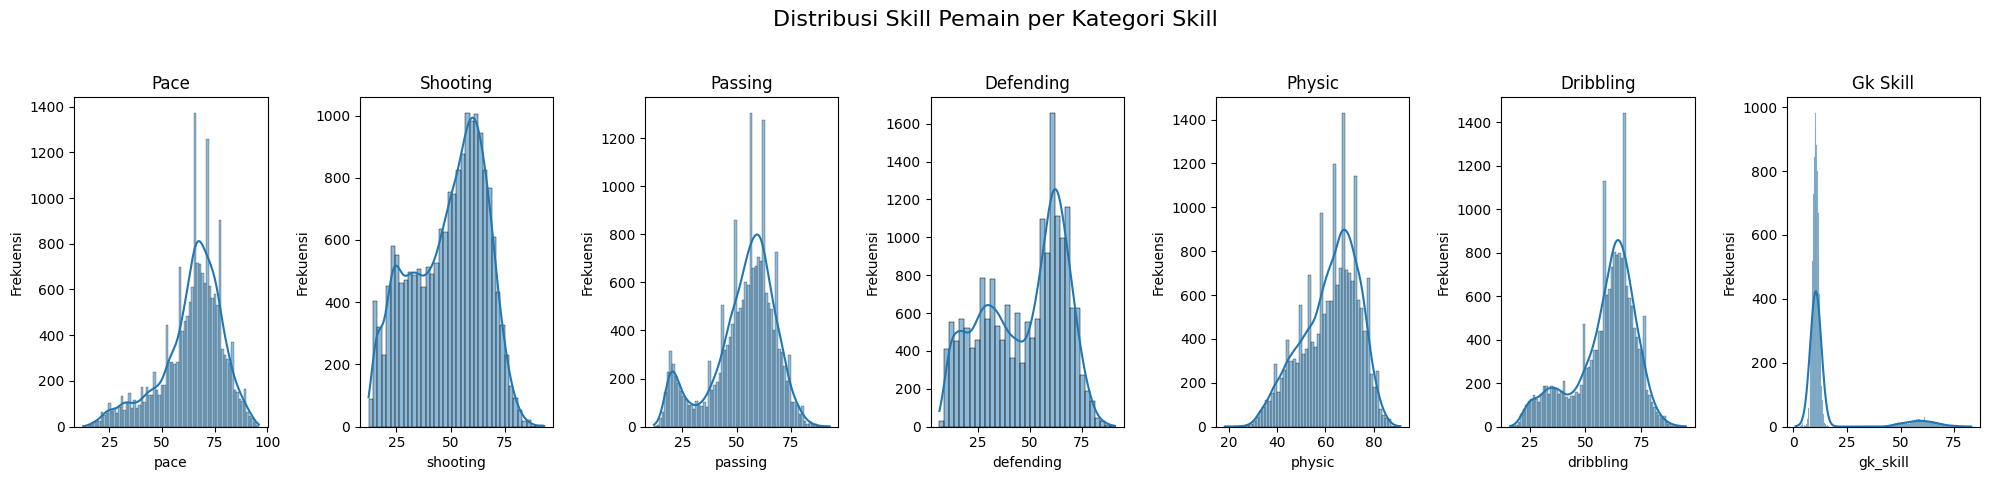

In [79]:
# distribusi skill pemain
fig, axes = plt.subplots(nrows=1, ncols=len(skill), figsize=(20, 5))
fig.suptitle('Distribusi Skill Pemain per Kategori Skill', fontsize=16)

for i, col in enumerate(skill):
    sns.histplot(player_df[col], ax=axes[i], kde=True)
    axes[i].set_title(col.replace('_', ' ').title())
    axes[i].set_ylabel('Frekuensi')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [80]:
# melihat posisi pemain
positions = player_df['player_positions'].str.split(', ').explode().value_counts()
print(positions)

player_positions
CM     3945
CB     3825
ST     3361
CDM    2819
LM     2377
RM     2365
CAM    2212
GK     2084
LB     2050
RB     2031
RW     1073
LW     1053
CF      369
LWB     335
RWB     331
Name: count, dtype: int64


Mengumpulkan posisi yang bervariasi menjadi 4 (GK, FW, MF, DF)

In [81]:
# memetakan posisi pertama player manjadi GK,DF,MF,dan FW
player_df['main_position'] = player_df['player_positions'].str.split(',').str[0]

position_map = {
    'GK': 'GK',
    'CB': 'DF', 'LB': 'DF', 'RB': 'DF', 'LWB': 'DF', 'RWB': 'DF',
    'CDM': 'MF', 'CM': 'MF', 'CAM': 'MF', 'LM': 'MF', 'RM': 'MF',
    'ST': 'FW', 'CF': 'FW', 'LW': 'FW', 'RW': 'FW'
}

# Terapkan mapping ke kolom baru
player_df['position_group'] = player_df['main_position'].map(position_map)

Melihat berapa frekuensi dari setiap posisi

<ipython-input-82-06eaf65b391f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=position_group_counts.index, y=position_group_counts.values, palette='viridis')


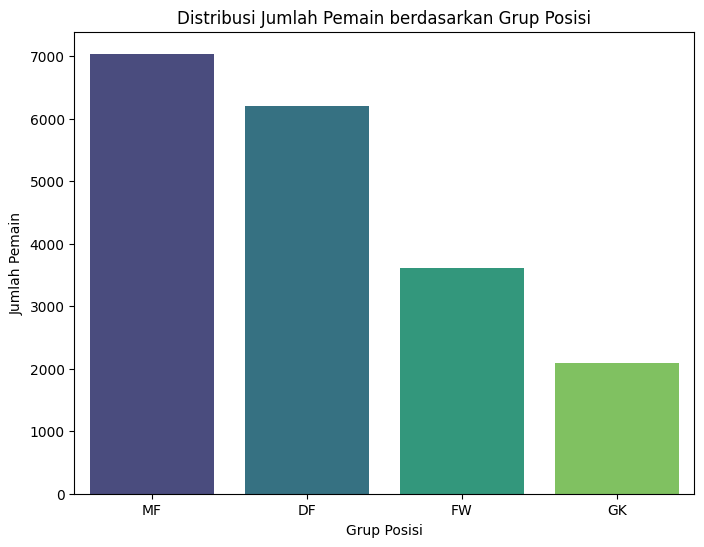

In [82]:
position_group_counts = player_df['position_group'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=position_group_counts.index, y=position_group_counts.values, palette='viridis')
plt.title('Distribusi Jumlah Pemain berdasarkan Grup Posisi')
plt.xlabel('Grup Posisi')
plt.ylabel('Jumlah Pemain')
plt.show()

Encoding kolom position_group

In [83]:
# encoding posisi grup
label_encoder = LabelEncoder()
player_df['position_group_encoded'] = label_encoder.fit_transform(player_df['position_group'])

In [84]:
# Menampilkan pemetaan dari nilai numerik ke label asli
encoded_to_original = dict(enumerate(label_encoder.classes_))
print("Mapping from encoded value to original label:")
print(encoded_to_original)

Mapping from encoded value to original label:
{0: 'DF', 1: 'FW', 2: 'GK', 3: 'MF'}


# MODEL KLASIFIKASI

In [85]:
X = player_df[skill]
y = player_df['position_group_encoded']

Karena X berdistribusi normal, maka akan distandarisasi

In [86]:
# standarisasi skill
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=skill)
X_scaled_df.head()

,pace,shooting,passing,defending,physic,dribbling,gk_skill
0,1.424086,2.596102,2.571491,-0.479350,0.250635,2.612169,-0.322456
1,1.699481,2.656089,1.889208,-0.634572,1.288006,2.176743,-0.271121
2,-0.882346,-1.651020,-1.499462,-1.600399,-0.527393,-0.895429,4.214359
3,0.942145,2.536114,1.684523,-0.220646,1.720245,1.886459,-0.360958
4,1.837179,2.176189,2.230349,-0.582832,-0.268051,2.539598,-0.258287


Splitting data

In [87]:
# splitting data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

## KNN

Evaluasi Training pada model KNN

In [88]:
y_pred_train_knn = knn.predict(X_train)
accuracy_train_knn = accuracy_score(y_train, y_pred_train_knn)
print(f"Akurasi KNN pada data training: {accuracy_train_knn:.4f}")

Akurasi KNN pada data training: 0.8620


Evaluasi Testing pada model KNN

In [89]:
k_range = range(1, 30)
accuracy_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

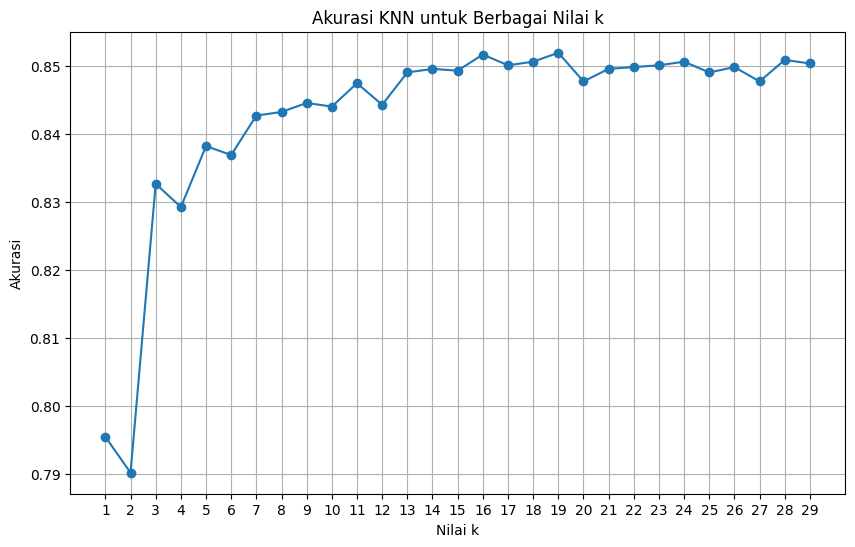

In [90]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracy_scores, marker='o')
plt.title('Akurasi KNN untuk Berbagai Nilai k')
plt.xlabel('Nilai k')
plt.ylabel('Akurasi')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [91]:
optimal_k = k_range[accuracy_scores.index(max(accuracy_scores))]
print(f"Nilai k optimal adalah: {optimal_k}")
print(f"Akurasi tertinggi untuk k={optimal_k} adalah: {max(accuracy_scores):.4f}")

Nilai k optimal adalah: 19
Akurasi tertinggi untuk k=19 adalah: 0.8519


Confusion matrix pada model KNN

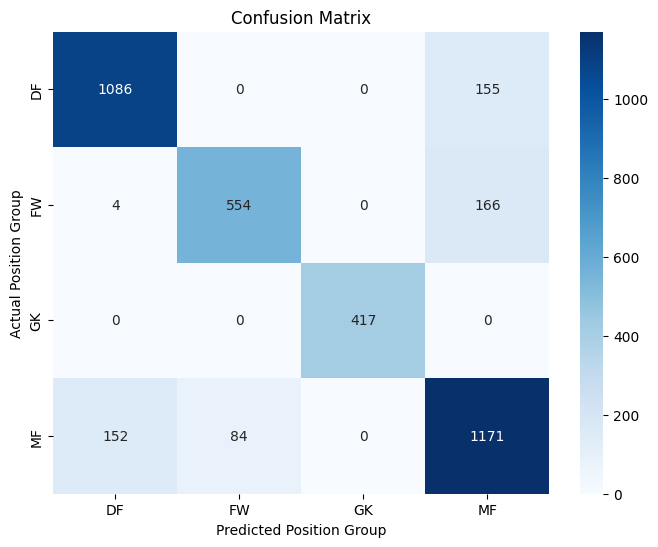


Classification Report:
              precision    recall  f1-score   support

          DF       0.87      0.88      0.87      1241
          FW       0.87      0.77      0.81       724
          GK       1.00      1.00      1.00       417
          MF       0.78      0.83      0.81      1407

    accuracy                           0.85      3789
   macro avg       0.88      0.87      0.87      3789
weighted avg       0.85      0.85      0.85      3789



In [92]:
# confusion matrix
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)

y_pred_optimal = knn_optimal.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred_optimal)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Position Group')
plt.ylabel('Actual Position Group')
plt.show()
print("\nClassification Report:")
print(classification_report(y_test, y_pred_optimal, target_names=label_encoder.classes_))

## RANDOM FOREST

Evaluasi Training pada model random forest

In [63]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [93]:
y_pred_train_rf = rf_model.predict(X_train)
accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
print(f"Akurasi Random Forest pada data training: {accuracy_train_rf:.4f}")

Akurasi Random Forest pada data training: 0.9999


Evaluasi Testing pada model random forest

Akurasi Random Forest: 0.8556


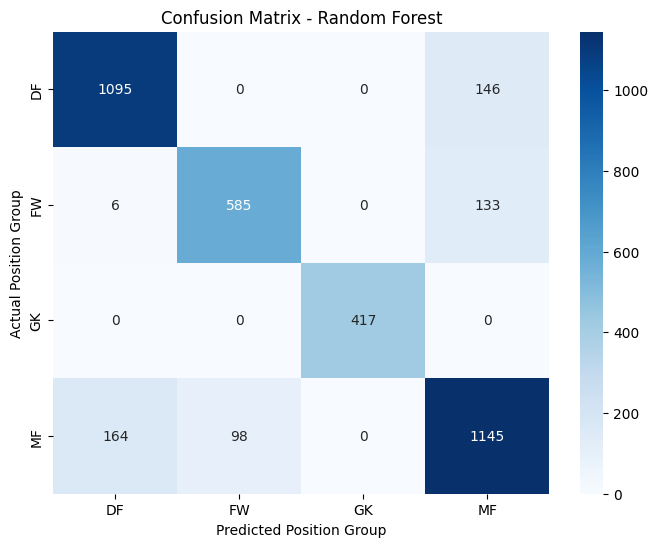


Classification Report (Random Forest):
              precision    recall  f1-score   support

          DF       0.87      0.88      0.87      1241
          FW       0.86      0.81      0.83       724
          GK       1.00      1.00      1.00       417
          MF       0.80      0.81      0.81      1407

    accuracy                           0.86      3789
   macro avg       0.88      0.88      0.88      3789
weighted avg       0.86      0.86      0.86      3789



In [94]:
# evaluasi model
y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Akurasi Random Forest: {accuracy_rf:.4f}")

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Position Group')
plt.ylabel('Actual Position Group')
plt.show()

print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

# PREDIKSI MODEL KNN dan RANDOM FOREST

Prediksi model KNN dan random forest dengan mengambil 5 data

In [95]:
random_samples = player_df.sample(n=5, random_state=42)
X_random = random_samples[skill]
X_random_scaled = scaler.transform(X_random)

# KNN
y_pred_random_knn = knn_optimal.predict(X_random_scaled)

# Random Forest
y_pred_random_rf = rf_model.predict(X_random_scaled)

original_positions = random_samples['position_group'].values

predicted_positions_knn = label_encoder.inverse_transform(y_pred_random_knn)
predicted_positions_rf = label_encoder.inverse_transform(y_pred_random_rf)

# Display the results
print("Original Positions:")
print(original_positions)
print("\nPredicted Positions (KNN):")
print(predicted_positions_knn)
print("\nPredicted Positions (Random Forest):")
print(predicted_positions_rf)

Original Positions:
['DF' 'DF' 'GK' 'FW' 'MF']

Predicted Positions (KNN):
['DF' 'DF' 'GK' 'FW' 'MF']

Predicted Positions (Random Forest):
['DF' 'DF' 'GK' 'FW' 'MF']
